2021-05-02 14:58:15.224 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
2012-01-10,15.214286,15.053571,15.211071,15.115714,258196400.0,13.020121


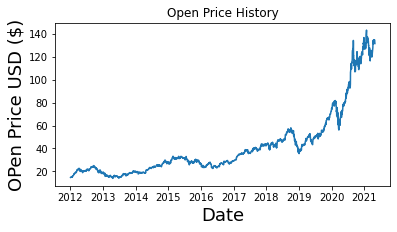

In [1]:
import pandas as pd
import numpy as np 
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import plotly.graph_objects as go
import plotly.express as px
import streamlit as st 
import requests
from pandas_datareader import data
from dateutil.relativedelta import relativedelta
import datetime as dt
from pandas_datareader.data import DataReader
from datetime import datetime
from PIL import Image
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# symbol=st.sidebar.text_input('Index Symbol',value='AAPL',max_chars=11)
symbol='AAPL'    
end=datetime.now()
# end='2020-01-01'
#start = datetime(end.year - 1, end.month, end.day)
start='2012-01-04'
#start = st.sidebar.slider("When do you start?",value=datetime(2000, 1, 1))
#end = st.sidebar.slider("When do you end?",value=datetime(2000, 1, 1))
# st.write(start,end)
dataset = DataReader(symbol, 'yahoo', start, end)
# st.subheader('Live '+ symbol+ ' Data read from Yahoo Finance')
# st.write(dataset)
# pd=dataset.drop(["Volume"],axis=1)
pd=dataset
#chart_data = pd[['Close','Open']]
plt.figure(figsize=(6,3))
plt.title('Open Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('OPen Price USD ($)', fontsize=18)
plt.plot(pd['Close'])
# st.set_option('deprecation.showPyplotGlobalUse', False)
# st.pyplot()
# st.image(f"https://charts2.finviz.com/chart.ashx?t={symbol}")

pd.head()





<AxesSubplot:xlabel='Date'>

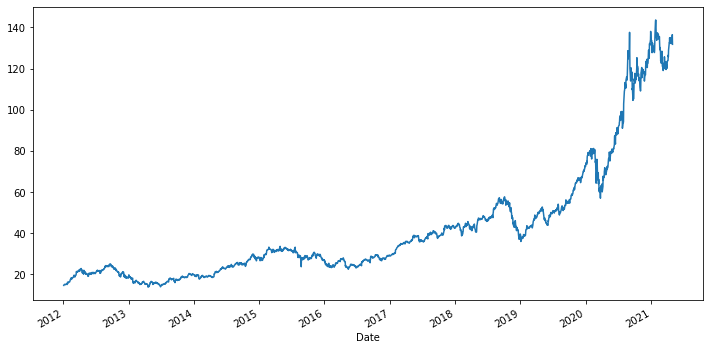

In [2]:
plt.rcParams.update({'figure.figsize': (12,6)})
dataset['Open'].plot()

In [3]:
# dataset['Close_diff'] = dataset['Close'] - dataset['Close'].shift(1)

# Calculate the log 
# dataset['adj_log'] = np.log(dataset['Close'])
# dataset['adj_sqrt'] = np.sqrt(dataset['Close'])
dataset['MA20'] = dataset['Close'].rolling(window = 20).std()

<AxesSubplot:xlabel='Date'>

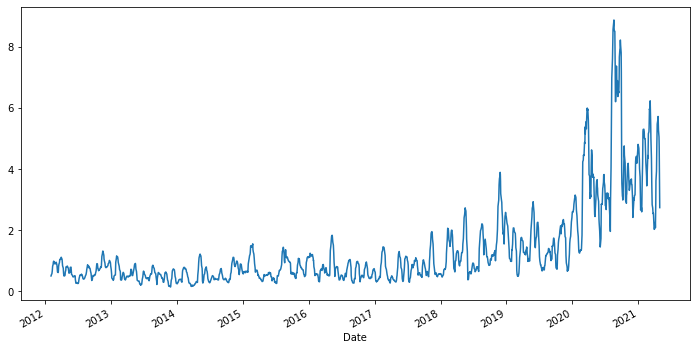

In [4]:
# dataset['Close_diff'].dropna().plot()

# dataset['Close_log_diff'] = dataset['adj_log'] - dataset['adj_log'].shift(1)
# dataset['Close_log_diff'].dropna().plot()

# dataset['Close_sqrt_diff'] = dataset['adj_sqrt'] - dataset['adj_sqrt'].shift(9)
# dataset['Close_sqrt_diff'].dropna().plot()

dataset['MA20'].dropna().plot()

In [5]:
# dataset=dataset['Close_log_diff']
# dataset=dataset['Close_sqrt_diff']

dataset=dataset['MA20']

In [6]:
from statsmodels.tsa.stattools import adfuller
dataset=dataset.dropna()

In [52]:
dataset.shape

(2327,)

In [8]:
adfuller_result = adfuller(dataset, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.9323892635445232
p-value: 0.04170913350109236
Critial Values:
   1%, -3.433197593068361
Critial Values:
   5%, -2.862798003151751
Critial Values:
   10%, -2.5674396919684996


In [9]:
from sklearn.model_selection import train_test_split
X  = dataset.values
X=X.reshape(-1, 1)
y = pd.iloc[:2327,3:4]
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0,test_size=.7)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predicted=regressor.predict(X_test)
    
acc = regressor.score(X_test, y_test)
print("Accuracy: " + str(acc))

Accuracy: 0.6862061401734797


In [59]:
from sklearn import metrics


In [60]:
print('R-Square Error:', metrics.r2_score(y_test,predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predicted)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))

R-Square Error: 0.6862061401734797
Mean Absolute Error: 11.565537959054012
Root Mean Squared Error: 15.921826674335906
Mean Squared Error: 253.50456464759435


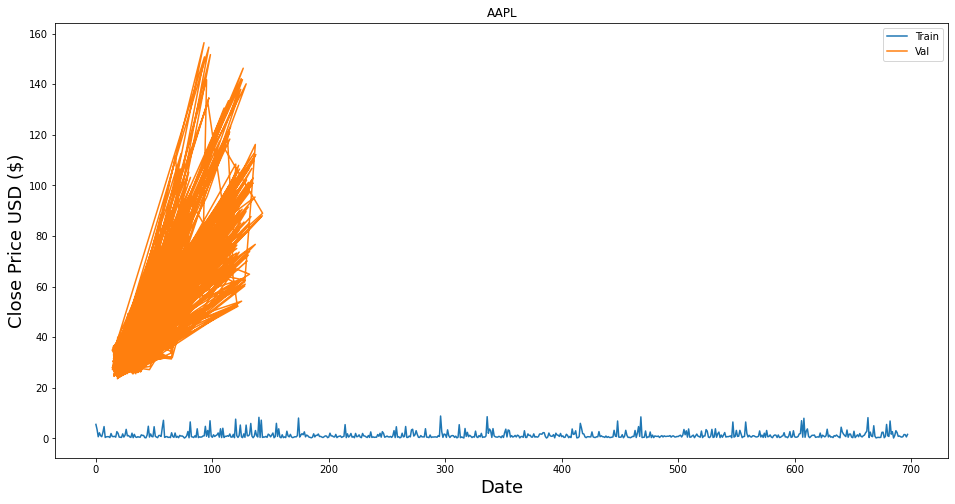

In [67]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title(symbol)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(X_train)
plt.plot(y_test,predicted)
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

In [51]:
dataset.shape

(2327,)

In [41]:
valid

Date
2016-09-15 00:00:00                                             0.638032
2016-09-16 00:00:00                                             0.748742
2016-09-19 00:00:00                                             0.806139
2016-09-20 00:00:00                                             0.857223
2016-09-21 00:00:00                                             0.900644
                                             ...                        
2021-04-27 00:00:00                                              4.71717
2021-04-28 00:00:00                                              4.02859
2021-04-29 00:00:00                                              3.43196
2021-04-30 00:00:00                                              2.73736
Predictions            [[24.800332826888535], [70.11952367131612], [2...
Name: MA20, Length: 1165, dtype: object